# 這個 Notebook 是探討 Cosine Similarity 與 Euclidean Disntance 之間的差異
* [範例程式碼是參考這裡](https://cmry.github.io/notes/euclidean-v-cosine)

In [1]:
import numpy as np

X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])


In [2]:
import pandas as pd

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


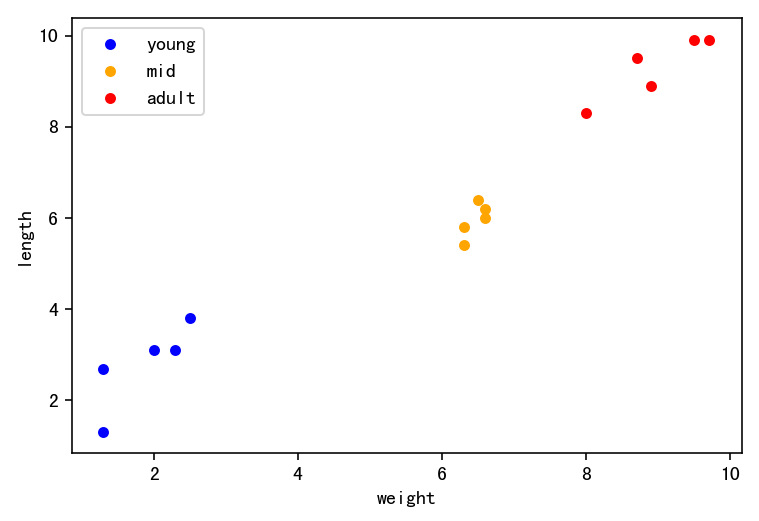

In [3]:
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax

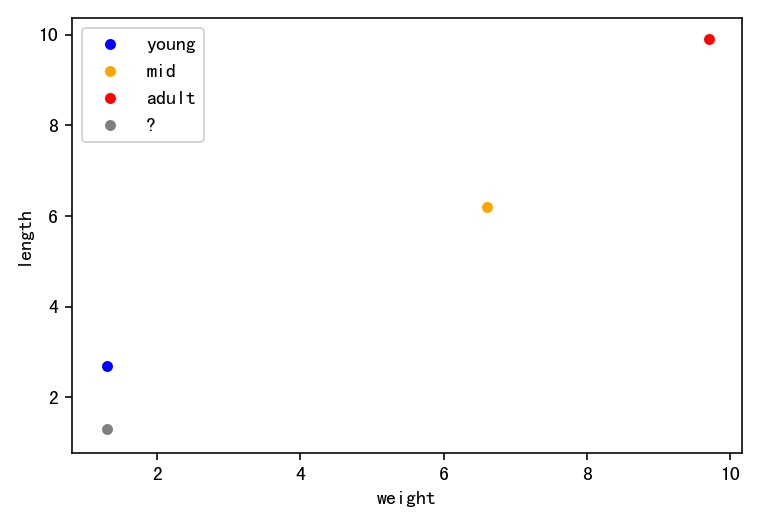

In [4]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)
ax

# 歐氏距離(差平方和後開根號)
# $ \sqrt{\sum^n_{i=1} {(x_i-y_i)^2}} $

In [5]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [6]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)

 x0: [ 6.6  6.2] 
 x1: [ 9.7  9.9] 
 x4: [ 1.3  2.7] 
x14: [ 1.3  1.3]


In [7]:
print(" x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

 x14 and x0: 7.21803297305 
 x14 and x1: 12.0216471417 
 x14 and x4: 1.4


# Cosine Similarity
# $\frac{x \bullet y}{ \sqrt{x \bullet x} \sqrt{y \bullet y}}$

In [8]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [9]:
print(" x14 and x0:", cosine_similarity(x14, x0), "\n",
      "x14 and x1:", cosine_similarity(x14, x1), "\n",
      "x14 and x4:", cosine_similarity(x14, x4))

 x14 and x0: 0.999512076087 
 x14 and x1: 0.999947942424 
 x14 and x4: 0.943858356366


![Imgur](https://i.imgur.com/wHe5by0.png)

# L1 & L2 Normalization : L2 就是除以平方和啦!!

* L1 : $\sum_i{x_i}$
* L2 : $\sum^n_{i=1}{{x_i}^2}$

In [10]:
?plt.scatter

In [11]:
def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

In [12]:
x0_n = l1_normalize(x0)
x1_n = l1_normalize(x1)
print(x0_n, x1_n)

[ 0.515625  0.484375] [ 0.49489796  0.50510204]


# 下面這兩張圖可以看的出來
* 經過 L1 Normalization後，兩個點之間距離靠近了。
* L1 的效果與 L2 的效果在這組資料上

(0, 10)

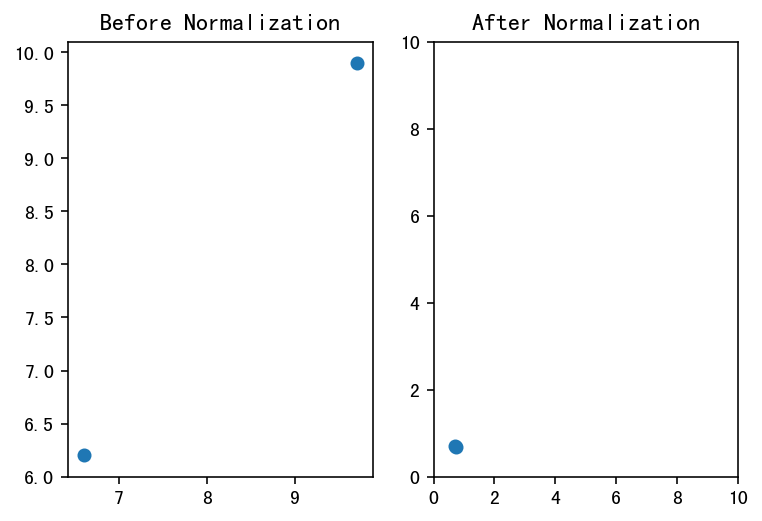

In [27]:
f,ax = plt.subplots(1,2)

# Before Normalization
ax[0].scatter(np.array(list(zip(x0,x1)))[0],np.array(list(zip(x0,x1)))[1])
ax[0].set_title('Before Normalization')



# After Normalization
ax[1].scatter(np.array(list(zip(x0_n,x1_n)))[0],np.array(list(zip(x0_n,x1_n)))[1])
ax[1].set_title('After Normalization')



## Set axis limits
plt.xlim(0, 10)
plt.ylim(0, 10)

[ 0.72884807  0.68467546] [ 0.69985497  0.71428497]


(0, 10)

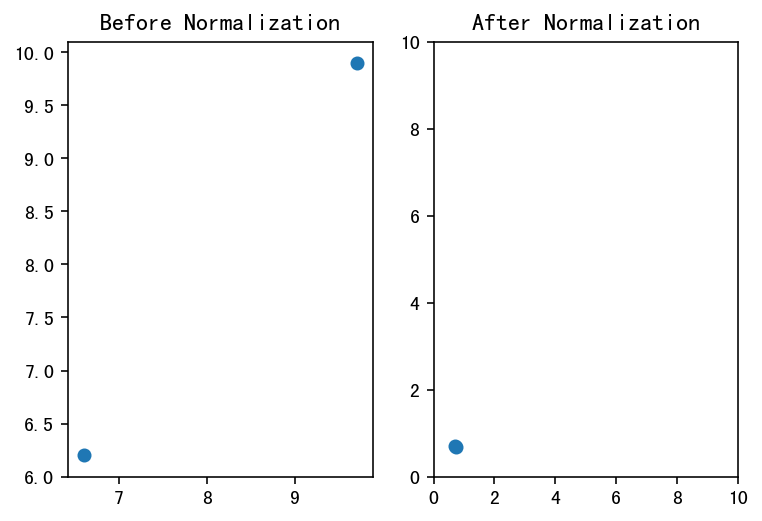

In [28]:
x0_n = l2_normalize(x0)
x1_n = l2_normalize(x1)
print(x0_n, x1_n)
f,ax = plt.subplots(1,2)

# Before Normalization
ax[0].scatter(np.array(list(zip(x0,x1)))[0],np.array(list(zip(x0,x1)))[1])
ax[0].set_title('Before Normalization')



# After Normalization
ax[1].scatter(np.array(list(zip(x0_n,x1_n)))[0],np.array(list(zip(x0_n,x1_n)))[1])
ax[1].set_title('After Normalization')



## Set axis limits
plt.xlim(0, 10)
plt.ylim(0, 10)

In [15]:
print("vectors \t", x0, x1, "\n"
      "euclidean \t", euclidean_distance(x0, x1), "\n"
      "cosine \t\t", cosine_similarity(x0, x1))
print('')
print("n_vectors \t", x0_n, x1_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x1_n), "\n"
      "cosine \t\t", cosine_similarity(x0_n, x1_n))

vectors 	 [ 6.6  6.2] [ 9.7  9.9] 
euclidean 	 4.82700735446 
cosine 		 0.99914133854

n_vectors 	 [ 0.515625  0.484375] [ 0.49489796  0.50510204] 
euclidean 	 0.0293124622303 
cosine 		 0.99914133854


# 結論
* 如果是看 euclidean distance 的話對於資料數據大小是有比較大的敏感度
* cosine similarity 當然是看方向性，以這例子來看的話都是呈現 45 度角左右，